In [2]:
#Importing libraries
import azureml.core
from azureml.core import Workspace, Dataset
from azureml.core import Experiment
#from azureml.widgets import RunDetails
#from azureml.core import Run
#from azureml.core import Experiment, ScriptRunConfig, Environment
#from azureml.core.runconfig import DockerConfiguration
#from azureml.widgets import RunDetails
import mlflow

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Creating the workspace
ws = Workspace.from_config()

#Linkg workspace with mlflow
mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())


In [6]:
dataset = Dataset.get_by_name(ws, name='AirlinesDelay')
df = dataset.to_pandas_dataframe()

Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
2023-03-09 21:46:05.700183 | ActivityCompleted: Activity=_dataflow, HowEnded=Failure, Duration=2.0 [ms], Info = {'activity_id': 'cd447476-421a-4be3-acbe-48b1aabdbe4e', 'activity_name': '_dataflow', 'activity_type': 'InternalCall', 'app_name': 'dataset', 'source': 'azureml.dataset', 'version': '1.49.0', 'dataprepVersion': '', 'sparkVersion': '', 'subscription': '', 'run_id': '', 'resource_group': '', 'workspace_name': '', 'experiment_id': '', 'location': '', 'completionStatus': 'Success', 'durationMs': 1759.2}, Exception=ImportError; Missing required package "azureml-dataset-runtime", which can be installed by running: "c:\Users\pablo.tamayo\Anaconda3\envs\myenv\python.exe" -m pip install azureml-dataset-runtime --upgrade
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
2023-03-09 21:46:05.700183 | Ac

ImportError: Missing required package "azureml-dataset-runtime", which can be installed by running: "c:\Users\pablo.tamayo\Anaconda3\envs\myenv\python.exe" -m pip install azureml-dataset-runtime --upgrade

In [4]:
%%writefile experiments/mlflow_eda.py

experiment_name ='exp-prueba'
mlflow.set_experiment(experiment_name)

with mlflow.start_run() as run:
    
    #logging dataset from azure
    dataset = Dataset.get_by_name(ws, name='AirlinesDelay')
    df = dataset.to_pandas_dataframe()
    
    #Distribution of the target column
    class_cero, class_one = df['Class'].value_counts()
    mlflow.log_metrics({'one':class_one, 'cero':class_cero})
    
    #Comparation of the mean
    cls_one_df = df.loc[df['Class']==1]
    mean_one = cls_one_df['Time'].mean()
    
    cls_cero_df = df.loc[df['Class']==0]
    mean_cero = cls_cero_df['Time'].mean()
    
    mlflow.log_metrics({'mean cero':mean_cero, 'mean one':mean_one})

    #plot distribution of time
    fig = plt.figure(figsize=(6,6))
    ax = fig.gca()    
    sns.displot(df['Length'])
    plt.show()
    mlflow.log_figure(fig, "plot.png")
    print("Plot listo!")
    
    
    #fig = plt.bar(x=['0','1'], height=[class_cero, class_one])
    #mlflow.log_figure(fig, 'plot.png')
    
    

Overwriting experiments/mlflow_eda.py


In [5]:
df.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


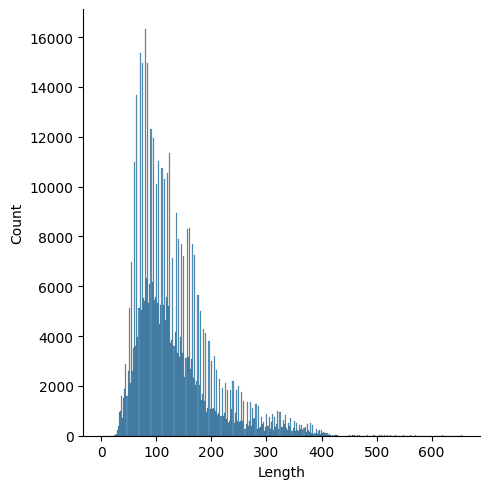

In [7]:
sns.displot(df['Length'])